<a href="https://colab.research.google.com/github/mizscrystal/SVM/blob/main/Feature_Selection_Generic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, decomposition, manifold, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, KFold
import random
random.seed()
np.random.seed()

In [ ]:
#features of the data
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'Attack']

In [ ]:
# Importing and Reading our data from csv file 
from google.colab import files
dataset = files.upload()
# Reading the dataset from Colab Local Repository


Saving Recruitment_Assessment.xlsx to Recruitment_Assessment.xlsx


In [ ]:
#dataset = pd.read_csv("kddcup.data_10_percent_corrected.gz")
dataset = pd.read_csv('kddcup.data_10_percent_corrected.gz', names=features, header=None)
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
dataset.shape

(311029, 42)

In [ ]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [ ]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Finding missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(dataset.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate   

In [ ]:
#Number of Rows
print("Including all kinds of attacks, total number of connections are ",len(dataset))

Including all kinds of attacks, total number of connections are  311029


In [ ]:
print('Dataset:')
for col_name in dataset.columns:
    if dataset[col_name].dtypes == 'object' :
        unique_cat = len(dataset[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Dataset:
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 11 categories
Feature 'Attack' has 38 categories


In [ ]:
print('Label distribution dataset, attack:')
print(dataset['Attack'].value_counts())

Label distribution dataset, attack:
smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
rootkit.                13
xterm.                  13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
loadmodule.              2
perl.                    2
udpstorm.                2
worm.                    2
phf.               

In [ ]:
print('Distribution of categories in Attack:')
print(dataset['protocol_type'].value_counts())

Distribution of categories in Attack:
icmp    164969
tcp     119357
udp      26703
Name: protocol_type, dtype: int64


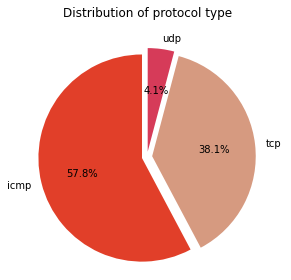

In [ ]:
#Drawing a pie chart to classify protocols of connections
colors = ["#E13F29", "#D69A80", "#D63B59"]
labels = ['icmp', 'tcp', 'udp']
sizes = [282342,186237,20156]
explode = (0.05, 0.05, 0.05)  

plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',colors=colors,shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of protocol type\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

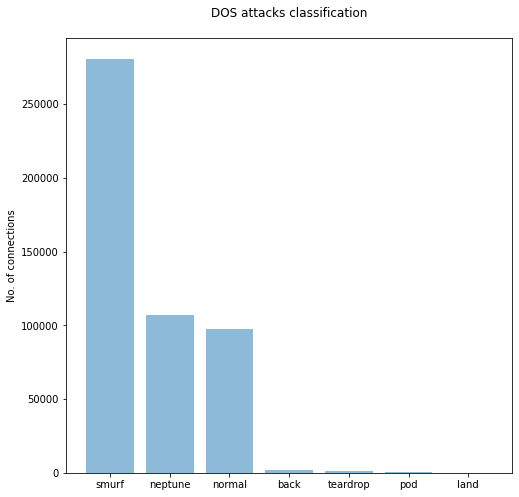

In [ ]:
#Drawing a bar graph to classify DOS attacks in connections
objects = ('smurf', 'neptune', 'normal', 'back', 'teardrop', 'pod', 'land')
y_pos = np.arange(len(objects))
performance = [280790,107201,97277,2203,979,264,21]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of connections')
plt.title('DOS attacks classification\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [ ]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
dataset.replace(cleanup_nums, inplace=True)
dataset.head()
#dataset.transpose()

,0,1,2,3,4,5,6,7,8,9,...,311019,311020,311021,311022,311023,311024,311025,311026,311027,311028
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
service,44,44,44,44,44,44,58,44,44,33,...,44,44,44,44,44,44,44,44,44,44
flag,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
src_bytes,105,105,105,105,105,105,29,105,105,223,...,105,105,105,105,105,105,105,105,105,105
dst_bytes,146,146,146,146,146,146,0,146,146,185,...,105,105,105,105,105,147,147,147,147,147
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Replacing all the types of DOS attacks as 1 and others as 0
dataset['Attack'][dataset['Attack']!='normal.'] = 'attack'
print(dataset['Attack'].value_counts())

attack     250436
normal.     60593
Name: Attack, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataset['Attack'][dataset['Attack']=='normal.'] = 0
dataset['Attack'][dataset['Attack']=='attack'] = 1
dataset[['Attack']] = dataset[['Attack']].apply(pd.to_numeric)
dataset['Attack'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    250436
0     60593
Name: Attack, dtype: int64

Feature Selection using genetic algorithm

In [ ]:
!pip install feature-selection-ga

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.0 MB/s 


In [ ]:
from feature_selection_ga import FeatureSelectionGA, FitnessFunction

class CustomFitnessFunctionClass:
    def __init__(self,n_total_features,n_splits = 3, alpha=0.01, *args,**kwargs):
        self.n_splits = n_splits
        self.alpha = alpha
        self.n_total_features = n_total_features

    def calculate_fitness(self,model,x,y):
        alpha = self.alpha
        total_features = self.n_total_features

        cv_set = np.repeat(-1.,x.shape[0])
        skf = StratifiedKFold(n_splits = self.n_splits)
        for train_index,test_index in skf.split(x,y):
            x_train,x_test = x[train_index],x[test_index]
            y_train,y_test = y[train_index],y[test_index]
            if x_train.shape[0] != y_train.shape[0]:
                raise Exception()
            model.fit(x_train,y_train)
            predicted_y = model.predict(x_test)
            cv_set[test_index] = predicted_y
        
        P = accuracy_score(y, cv_set)
        fitness = (alpha*(1.0 - P) + (1.0 - alpha)*(1.0 - (x.shape[1])/total_features))
        return fitness

In [ ]:
data = dataset
data["Attack"] = data["Attack"].astype('category')
data["Attack"] = data["Attack"].astype('category')
data["Label code"] = data["Attack"].cat.codes

In [ ]:
XX = data.iloc[0:100,0:73].to_numpy()
yy = data["Label code"][0:100]

model = RandomForestClassifier()
fsga = FeatureSelectionGA(model,XX,yy, ff_obj = FitnessFunction())
pop = fsga.generate(100)

EVOLVING.......
-- GENERATION 1 --
Evaluated 60 individuals
-- GENERATION 2 --
Evaluated 60 individuals
-- GENERATION 3 --
Evaluated 66 individuals
-- GENERATION 4 --
Evaluated 55 individuals
-- GENERATION 5 --
Evaluated 75 individuals
-- Only the fittest survives --
Best individual is [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], (1.0,)


In [ ]:
gen_columns =[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
all_columns=data.columns
gen__columns=[]

for i in range(len(gen_columns)):
    if gen_columns[i] == 1:
        gen__columns.append(all_columns[i])

In [ ]:
gen__columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_shells',
 'is_guest_login',
 'count',
 'srv_serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'Attack']